### Multiple Linear Regresison

##### Step 1: Data Preprocessing

Importing the libraries

In [10]:
import pandas as pd
import numpy as np

Importing the dataset

In [11]:
dataset = pd.read_csv("/home/azureuser/cloudfiles/code/Users/v-vkowtharap/Data_Science/Day-1_Preprocessing/studentscore.csv")
X = dataset.iloc[ : , :-1].values
Y = dataset.iloc[ : , : 4].values

In [12]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Encoding Categorical data

In [18]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder  
from sklearn.compose import ColumnTransformer  

# Ensure you select the correct column index for encoding  
# 'Category' column is at index 2  
categorical_column_index = 2 
  
labelencoder = LabelEncoder()  
X[:, categorical_column_index] = labelencoder.fit_transform(X[:, categorical_column_index])  
  
# Apply OneHotEncoder to the categorical feature  
ct = ColumnTransformer([('onehot', OneHotEncoder(), [categorical_column_index])], remainder='passthrough')  
X = ct.fit_transform(X)  
  
# If you need to convert to an array (although it usually is by default)  
X = X.toarray() if hasattr(X, 'toarray') else X  
  
print("Transformed X:\n", X)  


Transformed X:
 [[0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 

Avoiding Dummy Variable Trap

In [19]:
X = X[: ,1:]

Splitting the dataset into the Training set and Test set

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

##### Step 2: Fitting Multiple Linear Regression to the Training set

In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

##### Step 3: Predicting the Test set results

In [22]:
y_pred = regressor.predict(X_test)
print(y_pred)

[[ 5.46756757 56.18918919]
 [ 5.46756757 56.18918919]
 [ 5.46756757 56.18918919]
 [ 2.5        21.        ]
 [ 5.46756757 56.18918919]]


Visualize the Prediciton results

In [23]:
import matplotlib.pyplot as plt  
from sklearn.metrics import mean_absolute_error, mean_squared_error 

# Calculate evaluation metrics  
mae = mean_absolute_error(Y_test, y_pred)  
mse = mean_squared_error(Y_test, y_pred)  
rmse = np.sqrt(mse)  

print(f'Mean Absolute Error (MAE): {mae}')  
print(f'Mean Squared Error (MSE): {mse}')  
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 10.16
Mean Squared Error (MSE): 246.5353323593865
Root Mean Squared Error (RMSE): 15.701443639340509


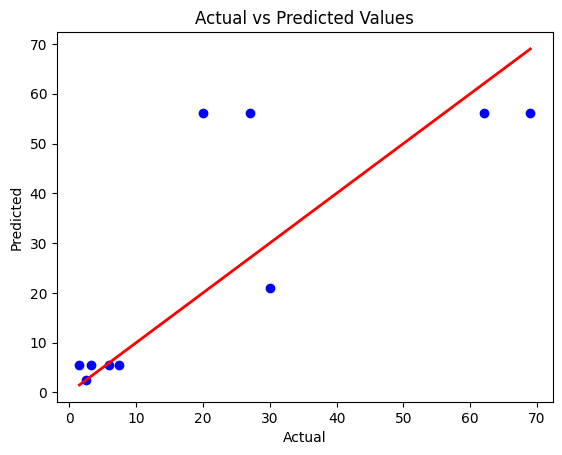

In [24]:
# Scatter plot of actual vs predicted values  
plt.scatter(Y_test, y_pred, color='blue')  
  
# Line of perfect prediction  
plt.plot([np.min(Y_test), np.max(Y_test)], [np.min(Y_test), np.max(Y_test)], color='red', linewidth=2)  
  
plt.xlabel('Actual')  
plt.ylabel('Predicted')  
plt.title('Actual vs Predicted Values')  
plt.show()  